In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

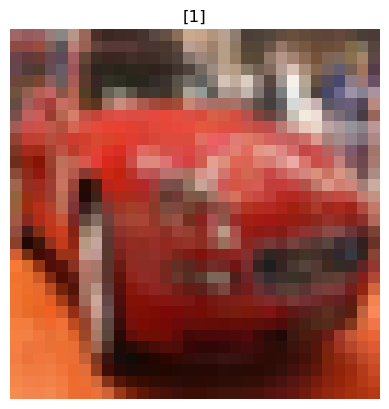

In [5]:
plt.imshow(X_train[5], cmap= 'gray')
plt.title(y_train[5])
plt.axis('off')
plt.show()

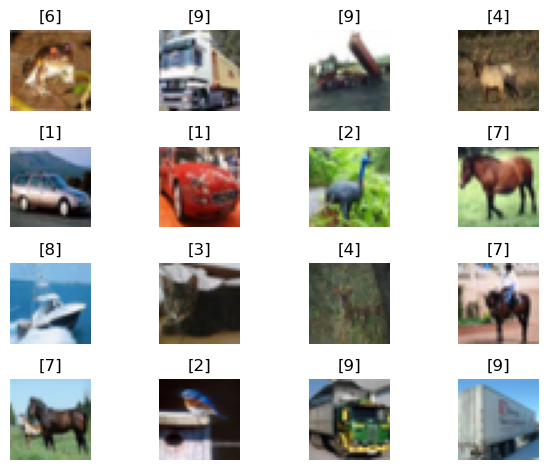

In [6]:
for i in range(16):
    plt.subplot(4,4, i + 1)
    plt.imshow(X_train[i], cmap= 'gray')
    plt.title(y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Normalize Pixel value to the range (0,1)

In [7]:
X_train, X_test =X_train / 255.0, X_test /255.0

# Convart Label to one dimentional arrays

In [8]:
y_train = y_train.flatten()

In [9]:
y_test = y_test.flatten()

# Create the model

In [10]:
cnn_model  = models.Sequential()

# Firsst Convolutional Block

In [11]:
cnn_model.add(layers.Conv2D(32,(3,3),
                             activation='relu',
                             input_shape=(32,32,3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2)))

# Second Convolutional Block

In [12]:
cnn_model.add(layers.Conv2D(64,(3,3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2)))

# Third Convolutional Block

In [13]:
cnn_model.add(layers.Conv2D(128, (3,3),activation='relu'))
cnn_model.add(layers.BatchNormalization())

# Fully Connect layers

In [14]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Print model Summary

In [15]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
cnn_model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',
                  metrics= ['accuracy'])

In [17]:
history = cnn_model.fit(X_train, y_train, epochs= 15, validation_split= 0.2,batch_size= 64,
                        verbose= 2)

Epoch 1/15
625/625 - 37s - 59ms/step - accuracy: 0.4413 - loss: 1.6789 - val_accuracy: 0.4975 - val_loss: 1.3982
Epoch 2/15
625/625 - 34s - 55ms/step - accuracy: 0.5883 - loss: 1.1740 - val_accuracy: 0.6075 - val_loss: 1.1226
Epoch 3/15
625/625 - 35s - 55ms/step - accuracy: 0.6498 - loss: 1.0084 - val_accuracy: 0.6417 - val_loss: 1.0054
Epoch 4/15
625/625 - 34s - 55ms/step - accuracy: 0.6911 - loss: 0.8873 - val_accuracy: 0.6569 - val_loss: 0.9850
Epoch 5/15
625/625 - 35s - 55ms/step - accuracy: 0.7204 - loss: 0.8000 - val_accuracy: 0.4921 - val_loss: 1.5623
Epoch 6/15
625/625 - 34s - 55ms/step - accuracy: 0.7447 - loss: 0.7233 - val_accuracy: 0.6213 - val_loss: 1.0997
Epoch 7/15
625/625 - 34s - 55ms/step - accuracy: 0.7666 - loss: 0.6649 - val_accuracy: 0.6373 - val_loss: 1.1666
Epoch 8/15
625/625 - 35s - 55ms/step - accuracy: 0.7858 - loss: 0.6065 - val_accuracy: 0.6474 - val_loss: 1.2450
Epoch 9/15
625/625 - 35s - 55ms/step - accuracy: 0.8017 - loss: 0.5538 - val_accuracy: 0.6872 - 

# Evaluate on test Data

In [18]:
test_loss, test_accuracy= cnn_model.evaluate(X_test, y_test, verbose= 2)
print(f' Test Accuracy {test_accuracy:.2f}')

313/313 - 2s - 5ms/step - accuracy: 0.7345 - loss: 0.9459
 Test Accuracy 0.73


In [27]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','apple','truck']

In [28]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'apple',
 'truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


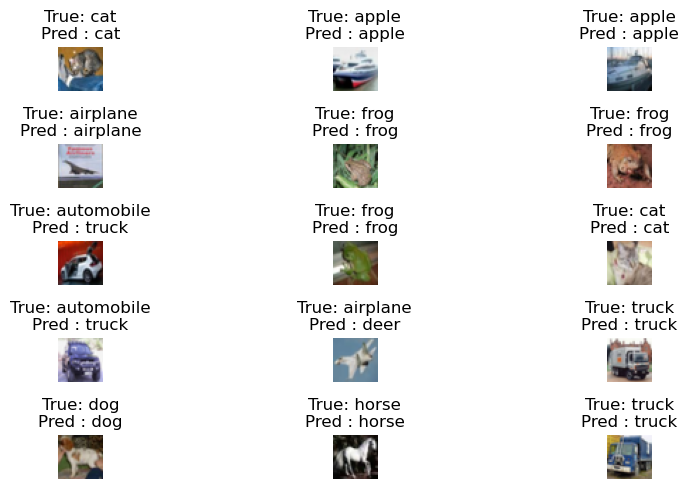

In [29]:
sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis = 1)

plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(5,3, i +1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {class_names[sample_labels[i]]}\nPred : {class_names[predictions[i]]}')
    plt.axis('off')


plt.tight_layout()
plt.show()

# plot accuracy and loss

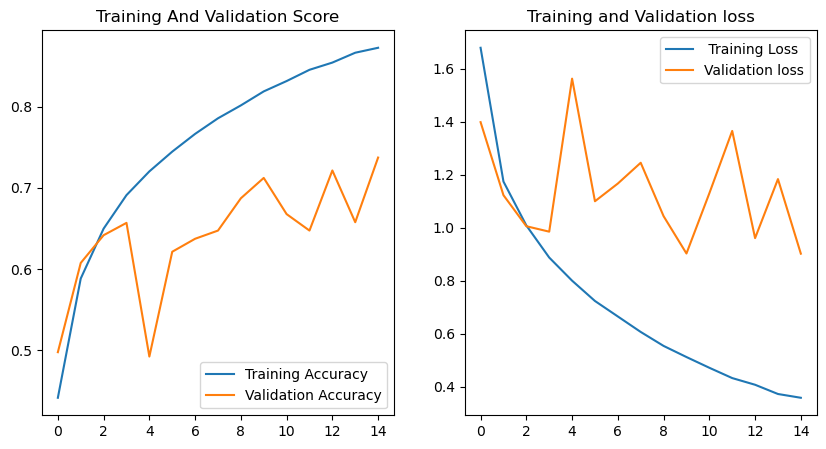

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Score')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label=' Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

plt.show()

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


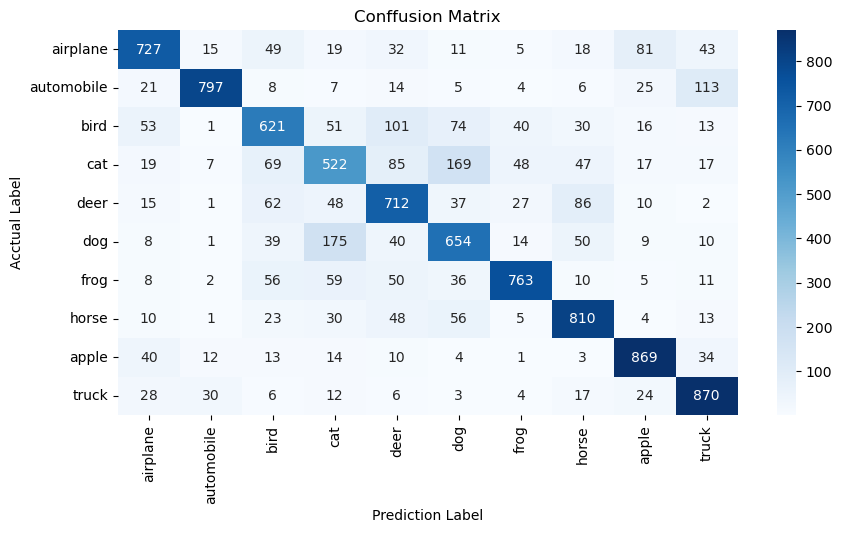

In [31]:
y_pred = np.argmax(cnn_model.predict(X_test), axis= 1)

confu_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(confu_mat, annot= True, fmt='d', cmap='Blues', xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Prediction Label')
plt.ylabel('Acctual Label')
plt.title('Conffusion Matrix')
plt.show()

# Generate a classiffication report

In [32]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.78      0.73      0.75      1000
  automobile       0.92      0.80      0.85      1000
        bird       0.66      0.62      0.64      1000
         cat       0.56      0.52      0.54      1000
        deer       0.65      0.71      0.68      1000
         dog       0.62      0.65      0.64      1000
        frog       0.84      0.76      0.80      1000
       horse       0.75      0.81      0.78      1000
       apple       0.82      0.87      0.84      1000
       truck       0.77      0.87      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



# save the model

In [33]:
cnn_model.save('cnn_cifar10_model.h5')
print('Model Save as "cnn_cifar10_model.h5"')

Model Save as "cnn_cifar10_model.h5"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


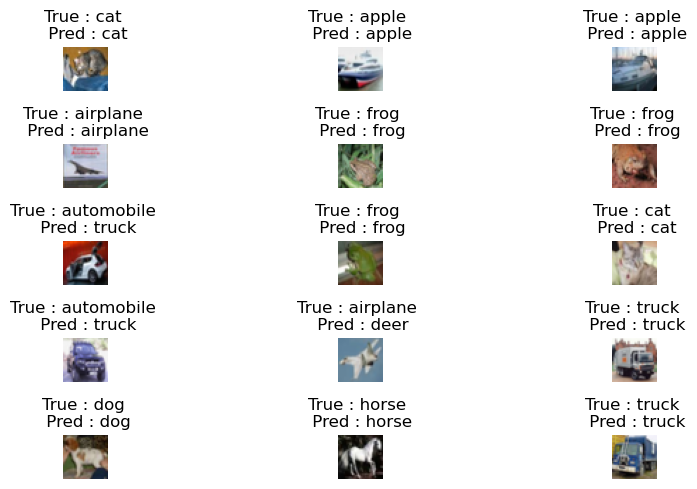

In [34]:
loded_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images) , axis= 1)

plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(5,3, i +1 )
    plt.imshow(sample_images[i])
    plt.title(f'True : {class_names[sample_labels[i]]} \n Pred : {class_names[predictions[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()